In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data = pd.read_csv("DataSet/Red Wine Quality.csv",sep=";")

In [86]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [87]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [88]:
data.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

/var/folders/q7/54zdqqsd2k97cjf5y4lqxf_00000gn/T/ipykernel_36298/712485675.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data['quality'], kde=True, palette='Set2')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


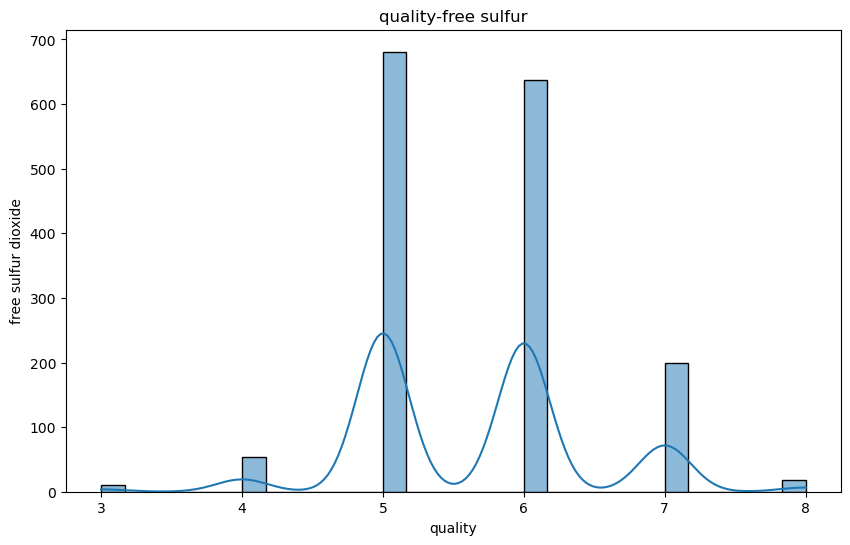

In [89]:
plt.figure(figsize=(10, 6))
plt.title('quality-free sulfur')
sns.histplot(data['quality'], kde=True, palette='Set2')
plt.xlabel('quality')
plt.ylabel('free sulfur dioxide')
plt.grid(False)
plt.show()


<Axes: >

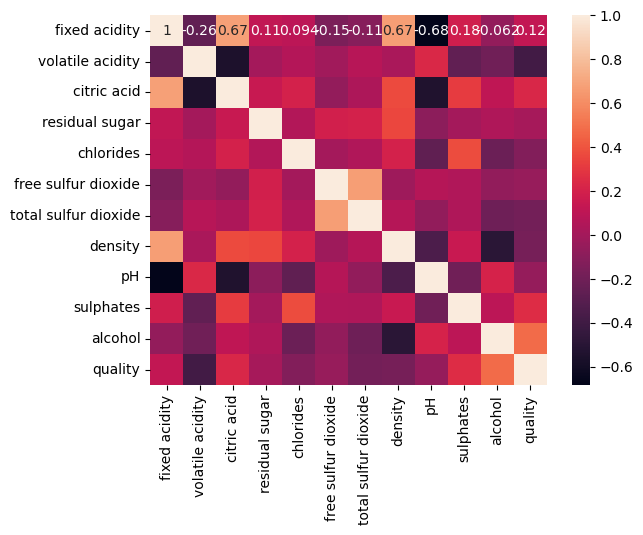

In [90]:
sns.heatmap(data.corr(),annot = True)

In [91]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [92]:
from sklearn.preprocessing import MinMaxScaler

# 创建 MinMaxScaler 对象
scaler = MinMaxScaler()

# 拟合并转换数据
scaled_data = scaler.fit_transform(data)
x_train = data.drop(columns=['quality'],axis=1)
x_target = data['quality']

In [103]:
x_train.head()
data = data[['quality','fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol' ]]

<Axes: >

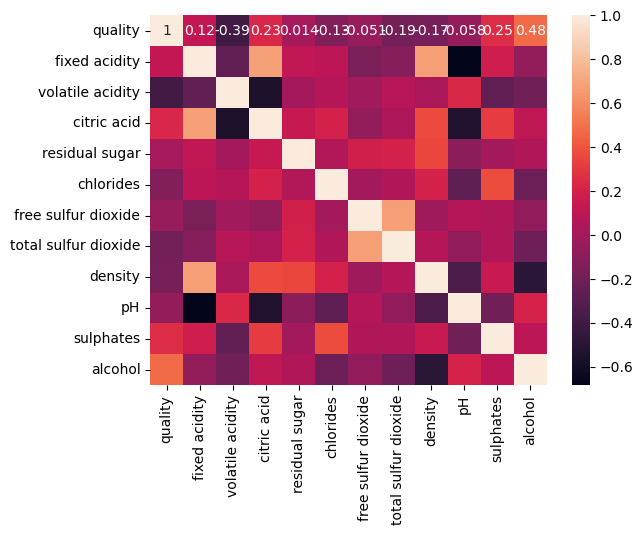

In [105]:
data.head()
sns.heatmap(data.corr(),annot= True)

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, x_target, random_state=1)


In [96]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit(x_train,y_train)

LinearRegression()

In [97]:
clf.predict(x_test)

array([5.54151742, 5.36697527, 6.10297524, 5.72712056, 6.69610178,
       5.97998404, 6.20846066, 5.07111397, 5.76515849, 5.15879411,
       6.16451966, 5.35627105, 5.57045997, 6.48419672, 5.6100852 ,
       5.35259629, 5.94324305, 5.42732464, 5.62374716, 5.41794815,
       5.75425012, 6.16059497, 5.3874175 , 6.44167925, 5.45411558,
       6.29678928, 6.1110399 , 5.67286098, 5.30822914, 5.81112765,
       5.24229045, 6.38624118, 5.20075297, 6.30560771, 4.90903447,
       5.72068416, 5.30481025, 5.36761373, 6.36721308, 5.06667062,
       6.06771405, 5.05351381, 5.21010334, 6.14683962, 5.11695656,
       5.79169173, 5.1111706 , 5.25588698, 5.1017325 , 6.05297708,
       5.64412145, 5.47151396, 6.24048912, 4.81769282, 5.09341079,
       5.97228133, 6.05855181, 5.95297285, 5.84399963, 5.25587457,
       6.28429584, 5.2120381 , 5.28160232, 5.53519489, 4.60072178,
       5.42724463, 6.65779568, 5.66796566, 5.7854608 , 6.44280015,
       4.90903447, 6.36895525, 5.66700492, 5.76525678, 5.40273

In [98]:
print(clf.coef_)
print(clf.intercept_)

[ 4.17074122e-02 -1.16668938e+00 -2.56507759e-01  1.79817344e-02
 -1.78766255e+00  4.92840577e-03 -3.55180773e-03 -3.54532471e+01
 -3.85018653e-01  8.83715942e-01  2.63878947e-01]
39.46110999985494


In [99]:
clf.predict(x_test)

array([5.54151742, 5.36697527, 6.10297524, 5.72712056, 6.69610178,
       5.97998404, 6.20846066, 5.07111397, 5.76515849, 5.15879411,
       6.16451966, 5.35627105, 5.57045997, 6.48419672, 5.6100852 ,
       5.35259629, 5.94324305, 5.42732464, 5.62374716, 5.41794815,
       5.75425012, 6.16059497, 5.3874175 , 6.44167925, 5.45411558,
       6.29678928, 6.1110399 , 5.67286098, 5.30822914, 5.81112765,
       5.24229045, 6.38624118, 5.20075297, 6.30560771, 4.90903447,
       5.72068416, 5.30481025, 5.36761373, 6.36721308, 5.06667062,
       6.06771405, 5.05351381, 5.21010334, 6.14683962, 5.11695656,
       5.79169173, 5.1111706 , 5.25588698, 5.1017325 , 6.05297708,
       5.64412145, 5.47151396, 6.24048912, 4.81769282, 5.09341079,
       5.97228133, 6.05855181, 5.95297285, 5.84399963, 5.25587457,
       6.28429584, 5.2120381 , 5.28160232, 5.53519489, 4.60072178,
       5.42724463, 6.65779568, 5.66796566, 5.7854608 , 6.44280015,
       4.90903447, 6.36895525, 5.66700492, 5.76525678, 5.40273

In [100]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test,clf.predict(x_test)))


0.38658138623755434


In [101]:
score = clf.score(x_test, y_test)
print(score)

0.3436370198437041
